In [5]:
#necessary modules
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel,preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys,os

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [4]:
!pip uninstall tensorflow-io -y`
!pip uninstall tensorflow -y
!pip install tensorflow
!pip install tensorflow-io

/bin/bash: -c: line 1: unexpected EOF while looking for matching ``'
/bin/bash: -c: line 2: syntax error: unexpected end of file
Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.9 MB/s eta 0:00:0000:0100:01


In [6]:
path='/kaggle/input/utkface-new/crop_part1/'
all_img=os.listdir(path)
all_img.remove('61_3_20170109150557335.jpg.chip.jpg')

In [7]:
import cv2 as cv
age_list=[]
gender_list=[]
image_list=[]
for img in all_img:
    age=img.split("_")[0]
    age_list.append(int(age))
    gender=img.split("_")[1]
    gender_list.append(int(gender))
    img=cv.imread(path+"/" + str(img))
    img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
    image_list.append(np.array(img))

In [8]:
image_list=np.array(image_list)
age_list=np.array(age_list)
gender_list=np.array(gender_list)

In [9]:
image_list[1].shape

(200, 200, 3)

In [10]:
image_list[1]

array([[[ 41,  43,  38],
        [ 39,  41,  36],
        [ 36,  38,  33],
        ...,
        [146, 139, 131],
        [168, 161, 153],
        [185, 178, 170]],

       [[ 39,  41,  36],
        [ 38,  40,  35],
        [ 36,  38,  33],
        ...,
        [142, 135, 127],
        [164, 157, 149],
        [182, 175, 167]],

       [[ 37,  39,  34],
        [ 37,  39,  34],
        [ 36,  37,  32],
        ...,
        [135, 128, 120],
        [158, 151, 143],
        [176, 169, 161]],

       ...,

       [[ 18,   7,   3],
        [ 19,   8,   4],
        [ 23,  10,   4],
        ...,
        [126, 122, 113],
        [149, 145, 136],
        [168, 165, 156]],

       [[ 20,   6,   3],
        [ 21,   7,   4],
        [ 25,  10,   5],
        ...,
        [128, 124, 115],
        [153, 149, 140],
        [173, 170, 161]],

       [[ 20,   6,   3],
        [ 22,   8,   5],
        [ 25,  10,   5],
        ...,
        [131, 127, 118],
        [156, 152, 143],
        [177, 174, 165]]

In [11]:
for i in range(len(image_list)):
    image_list[i]=image_list[i].astype('int64')

In [12]:
from sklearn.model_selection import train_test_split
X_train_age,X_test_age,Y_train_age,Y_test_age=train_test_split(image_list,age_list,test_size=0.25,random_state=42)
X_train_gender,X_test_gender,Y_train_gender,Y_test_gender=train_test_split(image_list,gender_list,test_size=0.25,random_state=42)

In [13]:
del(image_list)

In [14]:
Y_train_gender[13]

1

In [15]:
train_gen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)
test_gen=ImageDataGenerator(rescale=1./255)

In [17]:
batch_size=128
train_img=train_gen.flow(X_train_age,Y_train_age,
                         shuffle=True,
                         batch_size=batch_size)
test_img=test_gen.flow(X_test_age,Y_test_age,
                       shuffle=True,
                       batch_size=batch_size)

In [20]:
a=next(test_img)
a[1]

array([ 5, 24, 56, 52, 15, 53, 21, 24, 21, 90,  5, 86,  1, 39, 53, 18,  8,
       23, 60, 92, 18, 46,  2, 26,  1, 62,  2, 13, 24, 62, 25, 25, 55,  1,
       10, 35, 31, 37,  8, 46, 80,  4, 36, 68, 38, 21, 22, 30, 43, 58, 32,
        1, 96, 45, 28,  1, 10,  2, 26, 75, 55, 52, 68, 54, 26, 65, 72,  7,
       35, 56, 64,  1, 66, 50, 16, 53, 11, 39, 16,  1,  1,  7, 62, 85,  1,
       15,  1,  2, 65, 39, 31,  2, 32, 57, 18, 59, 53,  2, 46, 22, 58,  7,
        9, 22, 22,  3,  2, 21,  1, 29, 56,  2, 11,  1, 76, 12,  1,  9,  6,
        2, 39,  1, 58,  1,  1, 17, 66, 30])

In [22]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout,GlobalMaxPooling2D,MaxPooling2D,BatchNormalization

i=Input(shape=(X_train_age.shape[1:]))
x=Conv2D(32,(3,3),activation='relu',padding='same')(i)
x=BatchNormalization()(x)
x=Conv2D(32,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)
x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)
x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
#x=MaxPooling2D((2,2))(x) #decrease test accuracy
x=GlobalMaxPooling2D()(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(units=512,activation='relu')(x)
x=Dense(units=1,activation='linear')(x)

model_age=Model(i,x)

In [23]:
model_age.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 200, 200, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 200, 200, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0     

In [15]:
#compiling model, categorical crossentropy is used as input labels are one-hot encoded
model_age.compile(loss='mse',optimizer='adam',metrics=['mae'])
batch_size=128
r=model_age.fit(train_img,validation_data=test_img,
                      epochs=25,steps_per_epoch=int(np.ceil(len(X_train_age)/batch_size)),
                      validation_steps=int(np.ceil(len(X_test_age)/batch_size)))

Epoch 1/25
58/58 [==============================] - 110s 2s/step - loss: 562.6010 - mae: 19.6062 - val_loss: 1283.0487 - val_mae: 26.3495
Epoch 2/25
58/58 [==============================] - 79s 1s/step - loss: 408.0160 - mae: 16.0498 - val_loss: 1216.5632 - val_mae: 25.8815
Epoch 3/25
58/58 [==============================] - 79s 1s/step - loss: 325.2097 - mae: 13.9235 - val_loss: 1309.6829 - val_mae: 27.4622
Epoch 4/25
58/58 [==============================] - 78s 1s/step - loss: 293.9438 - mae: 13.0465 - val_loss: 1031.7742 - val_mae: 24.1523
Epoch 5/25
58/58 [==============================] - 79s 1s/step - loss: 258.3633 - mae: 12.0317 - val_loss: 837.5241 - val_mae: 22.1299
Epoch 6/25
58/58 [==============================] - 78s 1s/step - loss: 233.6393 - mae: 11.4248 - val_loss: 533.4313 - val_mae: 19.4184
Epoch 7/25
58/58 [==============================] - 78s 1s/step - loss: 220.4716 - mae: 11.0201 - val_loss: 684.6835 - val_mae: 19.6936
Epoch 8/25
58/58 [=========================

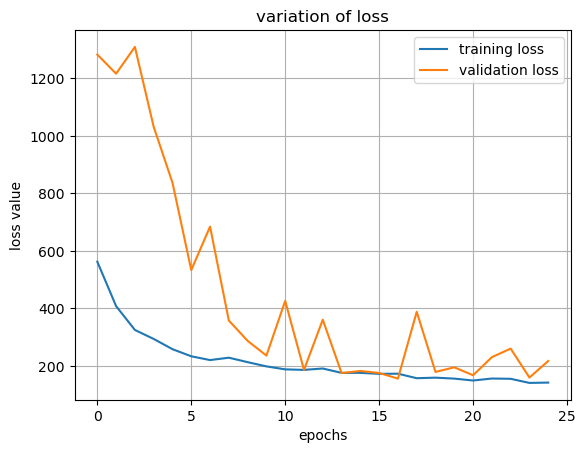

In [16]:
plt.plot(r.history['loss'],label='training loss')
plt.plot(r.history['val_loss'],label='validation loss');
plt.grid()
plt.xlabel("epochs")
plt.ylabel("loss value")
plt.title('variation of loss')
plt.legend();

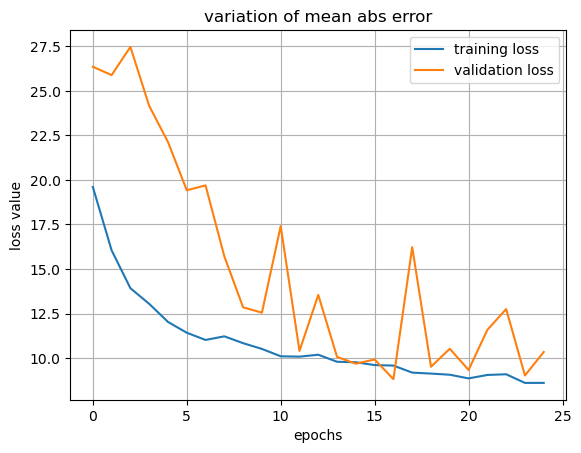

In [17]:
plt.plot(r.history['mae'],label='training loss')
plt.plot(r.history['val_mae'],label='validation loss');
plt.grid()
plt.xlabel("epochs")
plt.ylabel("loss value")
plt.title('variation of mean abs error')
plt.legend();

In [11]:
from tensorflow.keras.models import load_model
model_age=load_model('/kaggle/input/age-emotion/age_prediction/age_prediction.h5')

In [52]:
#prediction on validation set (argmax is taken as softmax will give prob of two classes and we are taking max out of them)
a=next(test_img)
y_predicted=np.squeeze(model_age.predict(a[0]))
y_original=a[1]

4/4 [==============================] - 0s 43ms/step


In [53]:
print(y_predicted)
print(y_original)

[47.873287   24.954422   44.181374   21.32421    20.777096   28.53828
 42.49872    57.59144    40.25993     4.7327247  27.174637   32.710453
 37.796368    9.573189   27.525482   29.830545    9.30314    33.235355
 26.099417   43.081314    2.0495203  44.984856   10.96396    31.821373
 38.303654   23.166433   16.30802     4.879849   31.647835   -0.76055074
 23.02546    35.37959    29.16702    27.09276    15.0996     27.106707
 26.556446   40.503044   13.113799   23.338177   51.5836      1.1988525
  0.54243284 42.8399      7.0584855  33.344765   34.541164   27.87714
 42.722168   50.14143    18.879787    9.938495   44.397522   30.634548
  0.41758314 62.37746    27.421135   22.81162    35.955585   35.77034
 21.773144    5.673954    9.990682   26.396692   21.224173    2.972652
 34.104813   26.866806   16.377596    3.5586565  35.9154     31.026028
 20.462154   29.426895   30.5092     25.432125   12.008837   30.432392
 33.459805    3.761735    2.1346495  12.474146    0.48417214 27.680632
 25.22

In [54]:
from sklearn.metrics import r2_score
print('r2 score: ', r2_score(y_original,y_predicted))

r2 score:  0.6562433006383893


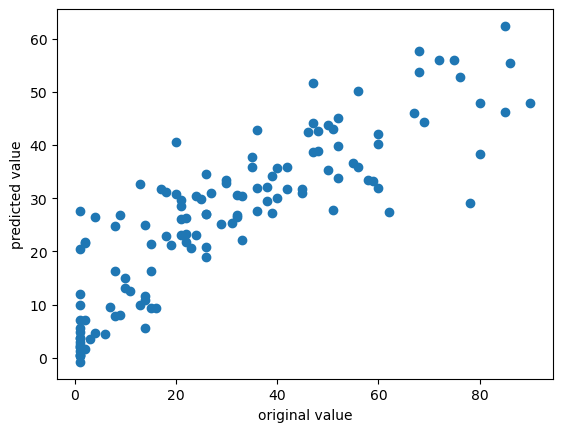

In [57]:
import matplotlib.pyplot as plt
plt.scatter(y_original,y_predicted)
plt.xlabel('original value')
plt.ylabel('predicted value');

In [58]:
from tensorflow.keras.models import save_model
new_model=save_model(model_age,'age_prediction_new.h5')

In [16]:
#gender prediction
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout,GlobalMaxPooling2D,MaxPooling2D,BatchNormalization
i=Input(shape=(X_train_gender.shape[1:]))
x=Conv2D(32,(3,3),activation='relu',padding='same')(i)
x=BatchNormalization()(x)
x=Conv2D(32,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)
x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)
x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
#x=MaxPooling2D((2,2))(x) #decrease test accuracy
x=GlobalMaxPooling2D()(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(units=512,activation='relu')(x)
x=Dense(units=1,activation='sigmoid')(x)

model_gender=Model(i,x)

In [17]:
model_gender.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 200, 200, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 200, 200, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0     

In [18]:
np.unique(Y_train_gender)

array([0, 1])

In [19]:
batch_size=128
train_img=train_gen.flow(X_train_gender,Y_train_gender,
                         shuffle=True,
                         batch_size=batch_size)
test_img=test_gen.flow(X_test_gender,Y_test_gender,
                       shuffle=True,
                       batch_size=batch_size)

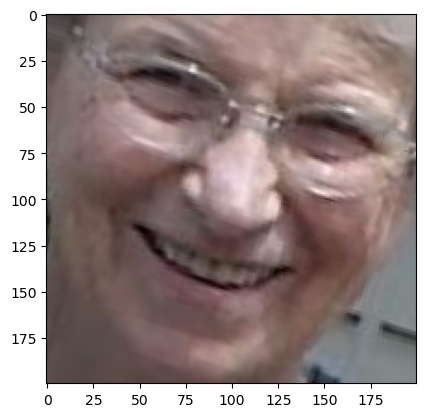

In [20]:
a=next(train_img)
plt.imshow(a[0][1])

In [21]:
#compiling model, categorical crossentropy is used as input labels are one-hot encoded
model_gender.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
batch_size=128
r=model_gender.fit(train_img,validation_data=test_img,
                      epochs=25,steps_per_epoch=int(np.ceil(len(X_train_gender)/batch_size)),
                      validation_steps=int(np.ceil(len(X_test_gender)/batch_size)))

Epoch 1/25
58/58 [==============================] - 103s 1s/step - loss: 0.8069 - accuracy: 0.6038 - val_loss: 0.6836 - val_accuracy: 0.5796
Epoch 2/25
58/58 [==============================] - 78s 1s/step - loss: 0.6459 - accuracy: 0.6267 - val_loss: 0.6775 - val_accuracy: 0.5861
Epoch 3/25
58/58 [==============================] - 77s 1s/step - loss: 0.6340 - accuracy: 0.6357 - val_loss: 0.6637 - val_accuracy: 0.5849
Epoch 4/25
58/58 [==============================] - 77s 1s/step - loss: 0.6257 - accuracy: 0.6479 - val_loss: 0.6357 - val_accuracy: 0.6164
Epoch 5/25
58/58 [==============================] - 76s 1s/step - loss: 0.5980 - accuracy: 0.6741 - val_loss: 0.6459 - val_accuracy: 0.6695
Epoch 6/25
58/58 [==============================] - 77s 1s/step - loss: 0.5746 - accuracy: 0.6908 - val_loss: 0.6703 - val_accuracy: 0.5853
Epoch 7/25
58/58 [==============================] - 77s 1s/step - loss: 0.5765 - accuracy: 0.6973 - val_loss: 0.6428 - val_accuracy: 0.6151
Epoch 8/25
58/58 [=

In [22]:
from tensorflow.keras.models import save_model
new_model=save_model(model_gender,'gender_prediction_new.h5')

In [23]:
a=next(test_img)
y_predicted=model_gender.predict(a[0])
y_pred=np.where(y_predicted>0.5,1,0)
y_original=a[1]

4/4 [==============================] - 2s 27ms/step


In [24]:
y_pred=np.squeeze(y_pred)

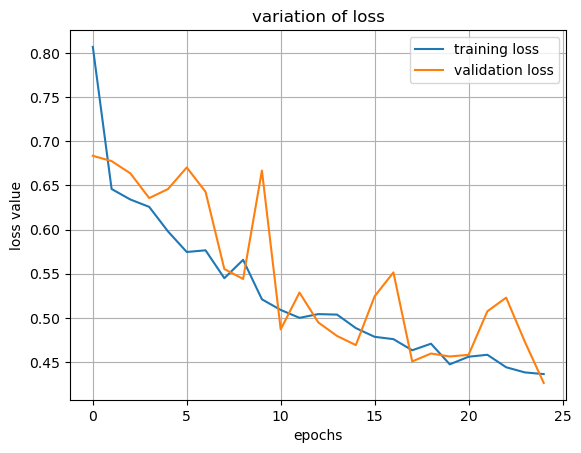

In [25]:
plt.plot(r.history['loss'],label='training loss')
plt.plot(r.history['val_loss'],label='validation loss');
plt.grid()
plt.xlabel("epochs")
plt.ylabel("loss value")
plt.title('variation of loss')
plt.legend();

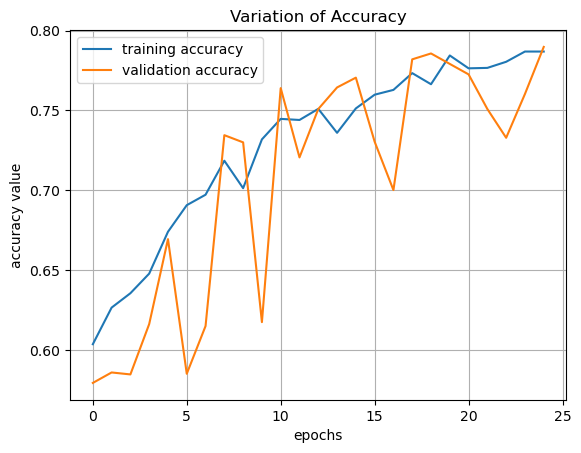

In [26]:
plt.plot(r.history['accuracy'],label='training accuracy')
plt.plot(r.history['val_accuracy'],label='validation accuracy')
plt.grid()
plt.xlabel("epochs")
plt.ylabel("accuracy value")
plt.title('Variation of Accuracy')
plt.legend();

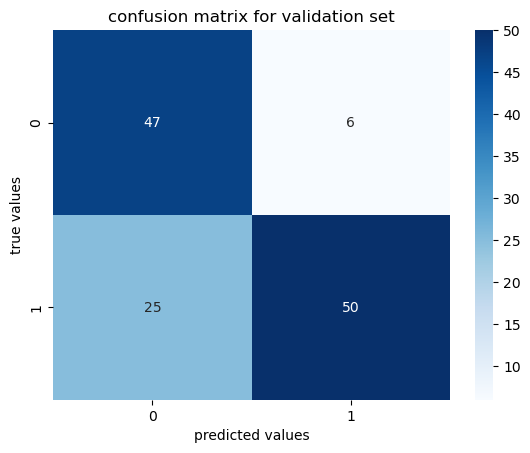

In [27]:
#dataframe for comparison
df_out=pd.DataFrame(zip(y_original,y_pred),columns=['original','predicted'])
#visualisation using confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(df_out['original'],df_out['predicted'])
import seaborn as sns
sns.heatmap(conf_mat,annot=True,fmt='.0f',cmap='Blues');
plt.xlabel("predicted values")
plt.ylabel("true values")
plt.title("confusion matrix for validation set");

In [29]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_gender,y_pred_thresh))

ValueError: Found input variables with inconsistent numbers of samples: [2445, 128]

 predicted level=female	original level=female


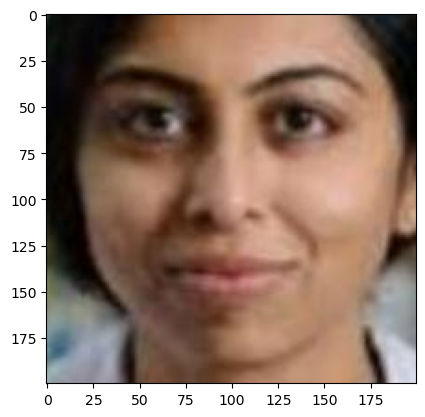

 predicted level=male	original level=male


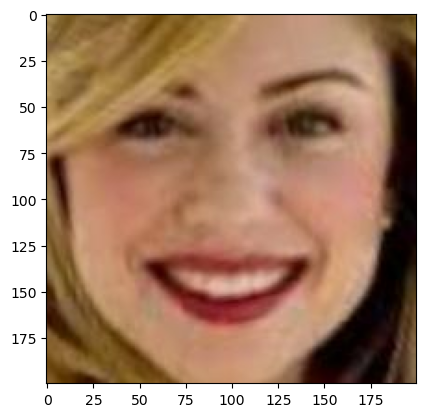

 predicted level=female	original level=female


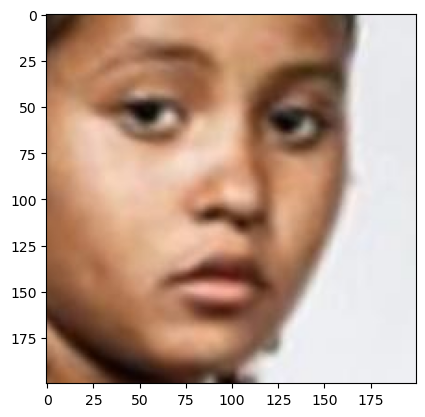

 predicted level=female	original level=female


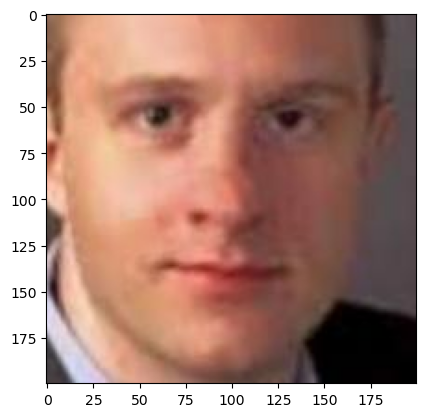

 predicted level=female	original level=female


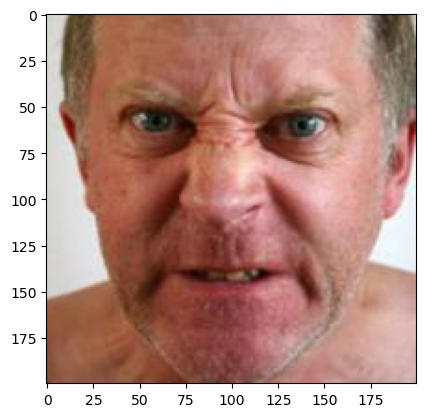

 predicted level=female	original level=female


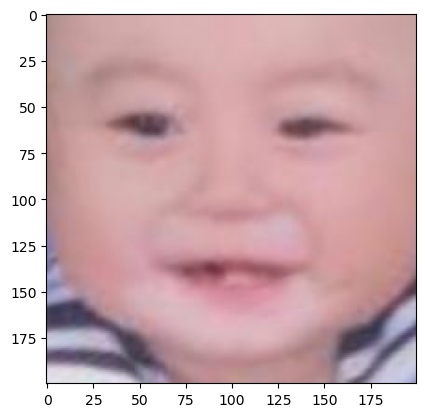

 predicted level=male	original level=male


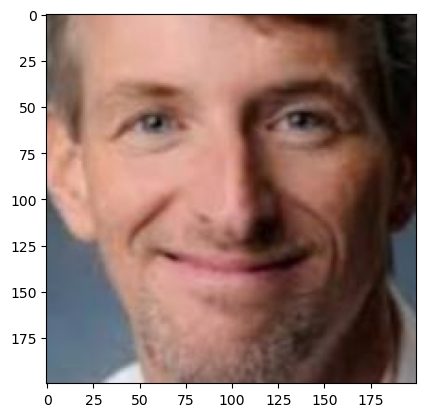

 predicted level=female	original level=female


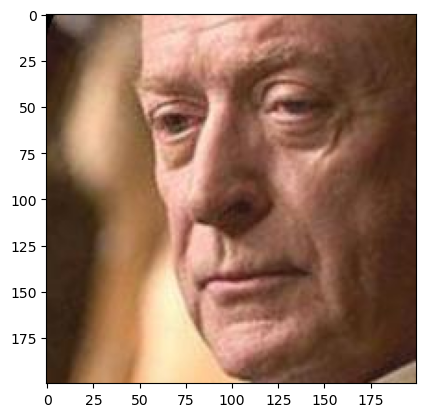

 predicted level=male	original level=male


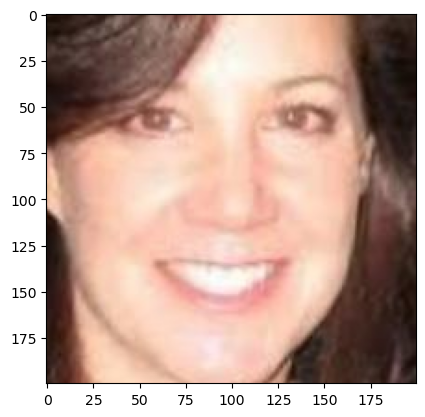

 predicted level=female	original level=female


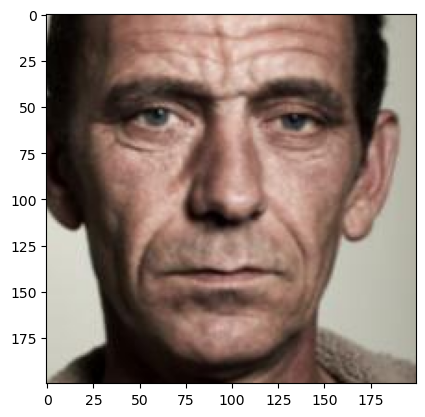

 predicted level=male	original level=male


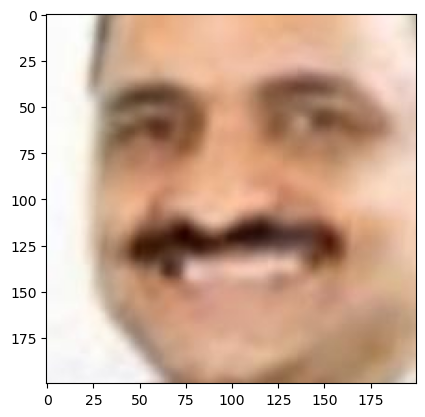

 predicted level=male	original level=male


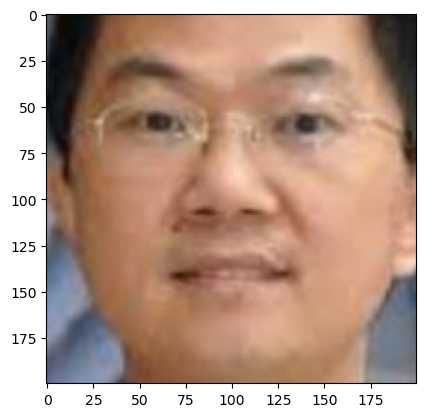

 predicted level=female	original level=female


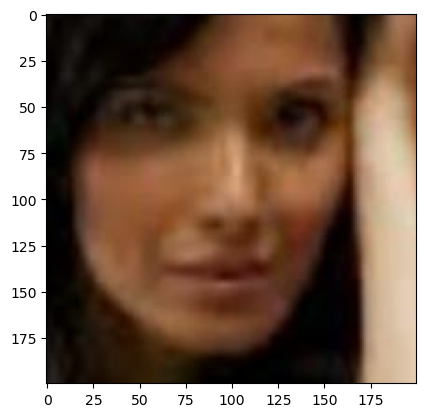

 predicted level=male	original level=male


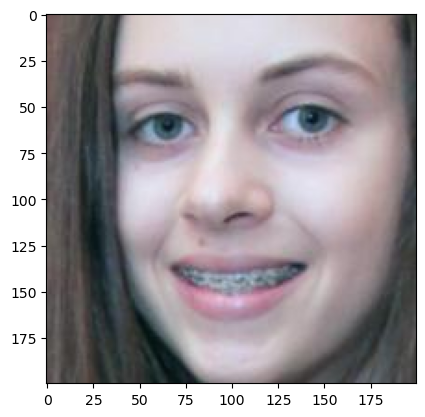

 predicted level=female	original level=female


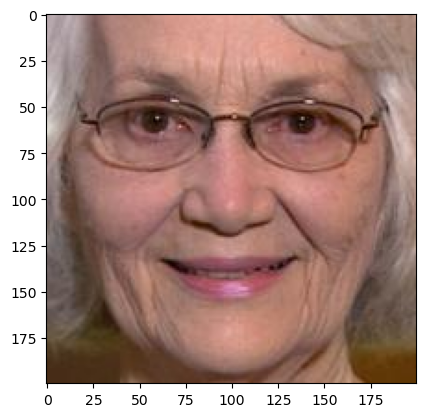

In [29]:
#missclassified image
my_dict={0:'male',
         1:'female'}
import tensorflow as tf
plt.gray()
misclassified_index=np.where(df_out['original']==df_out['predicted'])[0]
for i in misclassified_index[:15]:
    print(f'\033[91m predicted level={my_dict[y_pred[i]]}\toriginal level={my_dict[y_original[i]]}')
    plt.imshow(X_test_gender[i])
    plt.show()